- Run in R

In [38]:
library(Seurat)
library(tidyverse)
library(here)
library(schard)
library(repr)
options(repr.plot.width = 14, repr.plot.height = 6)
options(future.globals.maxSize = 100 * 1024^3) 

In [39]:
tumor  <-  h5ad2seurat(here('output/9_annotated_subcluster_embedding_tumor_nmf_added.h5ad'))
tumor <- SCTransform(tumor, vars.to.regress = "sample_id", verbose = FALSE) |> 
    RunPCA(verbose = FALSE) |> 
    RunUMAP(dims = 1:30, verbose = FALSE)
tumor

Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12431 by 13249

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Found 19 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12431 genes

Computing corrected count matrix for 12431 genes

Calculating gene attributes

Wall clock passed: Time difference of 17.4097

An object of class Seurat 
24862 features across 13249 samples within 2 assays 
Active assay: SCT (12431 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 5 dimensional reductions calculated: XscVI_, Xumap_, scviextracontinuouscovs_, pca, umap

# Load data

In [49]:
adata_f  <-  h5ad2seurat(here('public/allen_fetal_nmf_filtered.h5ad'))
adata_f <- SCTransform(adata_f, vars.to.regress = "sample", verbose = FALSE) |> 
    RunPCA(verbose = FALSE) |> 
    RunUMAP(dims = 1:30, verbose = FALSE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



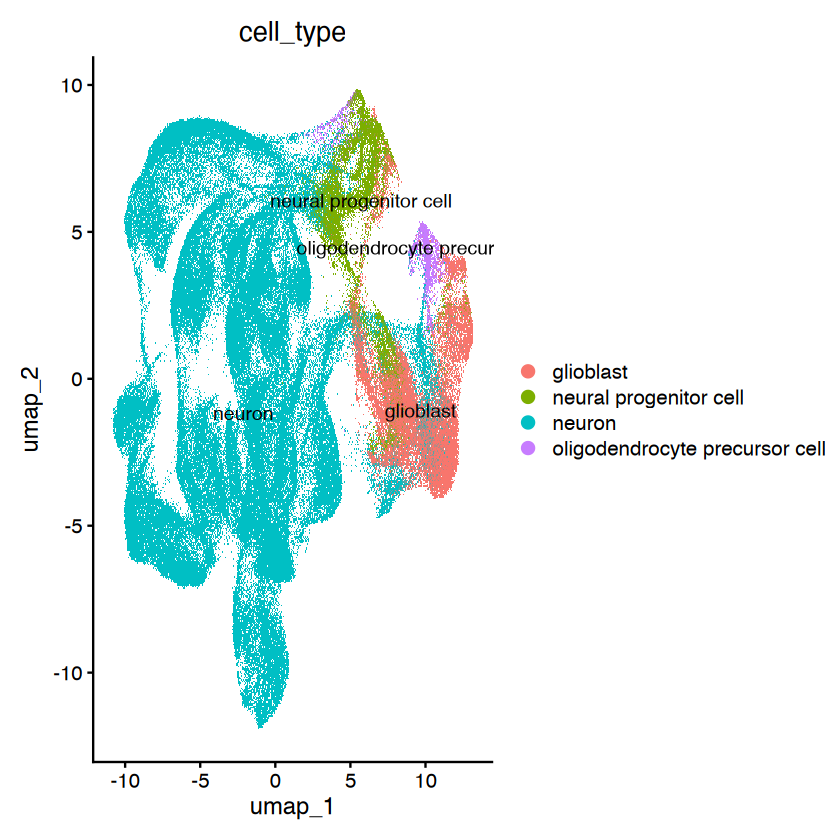

In [24]:
DimPlot(adata_f, reduction = "umap", group.by = c("cell_type", "sample"), label = TRUE)

In [ ]:
adata_a

In [12]:
adata_a <- h5ad2seurat(here('public/allen_adult_nmf_filtered.h5ad'))
adata_a <- SCTransform(adata_a, vars.to.regress = "sample", verbose = FALSE) |> 
    RunPCA(verbose = FALSE) |> 
    RunUMAP(dims = 1:30, verbose = FALSE)

An object of class Seurat 
20861 features across 74679 samples within 1 assay 
Active assay: RNA (20861 features, 0 variable features)
 2 layers present: counts, data
 5 dimensional reductions calculated: Xpca_, Xpcaharmony_, Xpcaorig_, Xumap_, spatialcoords_

# 2. Project each

In [20]:
adata_a

An object of class Seurat 
26153 features across 231726 samples within 1 assay 
Active assay: RNA (26153 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: Xumap_

In [21]:
anchors <- FindTransferAnchors(reference = adata_a, query = tumor, reference.reduction = "pca", dims = 1:20, k.filter = NA)

ERROR: Error: reference.reduction (pca) is not present in the provided reference object.


# 3. Integrate then project (not good idea)